# **CUSTOMER SEGMENTATION USING K-MEANS CLUSTERING**

### **Author**: Sampson Chinonso Ipiankama

### **Industry Focus:** Retail

### **Problem Statement:** A retail store wants to get insights about its customers. And then build a system that can cluster customers into different groups.

### **Goals:** To customize market programs that will be suitable for each of its customer segments. To also raise further market research questions as well as providing directions to finding the solutions

## Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


## Import Dataset

In [2]:
df= pd.read_csv('Customers.csv', index_col = 0) #loads the csv file into a pandas dataframe

## Exploratory Data Analysis

In [3]:
df.head() #returns the first 5 rows

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.rename(columns= {'Genre': 'Gender'}, inplace = True) #To rename column 2 from Genre to Gender

In [5]:
df.head() #Checking if the correction has been effected

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


The Gender column now has the correct spelling.

In [6]:
df.shape #retuns the number of rows and columns in the dataset.

(200, 4)

There are 200 data points.

In [7]:
df.describe() #returns the descriptive statistics of the dataset.

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [8]:
df.dtypes #returns the data types of the variables

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
df.isnull().sum() #returns the number of missing values

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

The output result shows that there are no missing values

In [10]:
df.duplicated() #Checking for duplicate values.

CustomerID
1      False
2      False
3      False
4      False
5      False
       ...  
196    False
197    False
198    False
199    False
200    False
Length: 200, dtype: bool

There are no missing values.

# Data Visualization

## Create a Scatterplot between Annual Income (k$) and Spending Score (1-100)

Text(0.5, 1.0, 'Scatterplot Between Annual Income (k$) and Spending Score (1-100)')

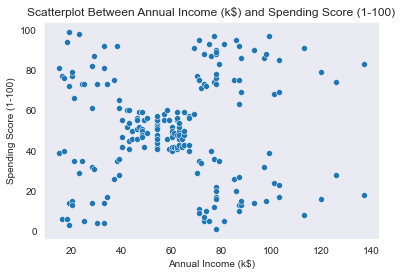

In [11]:
sns.set_style('dark')
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatterplot Between Annual Income (k$) and Spending Score (1-100)')

The scatterplot shows that there's some relationship between coustomers whose annual income lies between 40k - $60k.These customers have a typical spending score which lies between 40 -60. 

## Feature Selection(Choosing the columns of interest for clustering)

We are only interested in the Annual Income (k$) and Spending Score (1–100). So let's extract these columns from our dataset using the .loc() function

In [12]:
X = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values

## Feature Normalization

Feature normalisation 
helps to adjust all the data elements to a common scale in 
order to improve the performance of the clustering algorithm. 
Each data point is converted to the range of 0 to +1. 
Normalisation techniques include Min-max, decimal scaling 
and z-score. The MinMaxScaler normalisation technique was used to 
normalise the features before running the k-Means algorithm 
on the dataset.

In [13]:
scaler = MinMaxScaler().fit(X) #It makes an object of the MinMaxScaler and then we fit it on our variable X. 
print(scaler)

MinMaxScaler()


The output shows that it is an object of MinMaxScaler. And we have just fitted the our MinMaxScaler on our X variable. Note that we have not applied the transformation yet.

In [14]:
scaler.feature_range

(0, 1)

The range is between 0 and 1. When we apply the transform function all the Annual Income (k$) and Spending Score the all the values will lie between 0 and 1. No value will be less than 0 and greater than 1.  

In [15]:
scaler.transform(X) 

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918],
       [0.01639344, 0.76530612],
       [0.02459016, 0.05102041],
       [0.02459016, 0.94897959],
       [0.03278689, 0.02040816],
       [0.03278689, 0.7244898 ],
       [0.03278689, 0.13265306],
       [0.03278689, 1.        ],
       [0.04098361, 0.14285714],
       [0.04098361, 0.7755102 ],
       [0.04098361, 0.12244898],
       [0.04098361, 0.79591837],
       [0.04918033, 0.34693878],
       [0.04918033, 0.66326531],
       [0.06557377, 0.28571429],
       [0.06557377, 0.98979592],
       [0.07377049, 0.34693878],
       [0.07377049, 0.73469388],
       [0.08196721, 0.04081633],
       [0.08196721, 0.73469388],
       [0.10655738, 0.13265306],
       [0.10655738, 0.82653061],
       [0.10655738, 0.31632653],
       [0.10655738, 0.6122449 ],
       [0.1147541 , 0.30612245],
       [0.1147541 , 0.87755102],
       [0.

The output shows the transformed numbers of our variables Annual Income (k$) and Spending Score. All the values are between 0 and 1. There are no negative values and no number is greater than 1.

## Choosing the Optimum Number of Clusters

a) To find the optimum number of clusters we'd used the WCSS (Within Clusters Sums of Squares)

b)Plot an Elbow graph. 

### Note: We create a for loop and find the wcss value for when we condisder one cluster and then two clusters up to 10. And then find the minimum wcss value

In [16]:
wcss = []

for i in range(1,11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X) #Finds the Kmeans to our data
    wcss.append(kmeans.inertia_) #This gives us the wcss values for each clusters

C:\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## b) Plot an elbow graph

The Elbow method is a really common method as well as the concept would be to perform k-means clustering for a range of k clusters (let's say 1 to 10) and to measure the sum of square distances from each point to its assigned center for each value.

<function matplotlib.pyplot.show(close=None, block=None)>

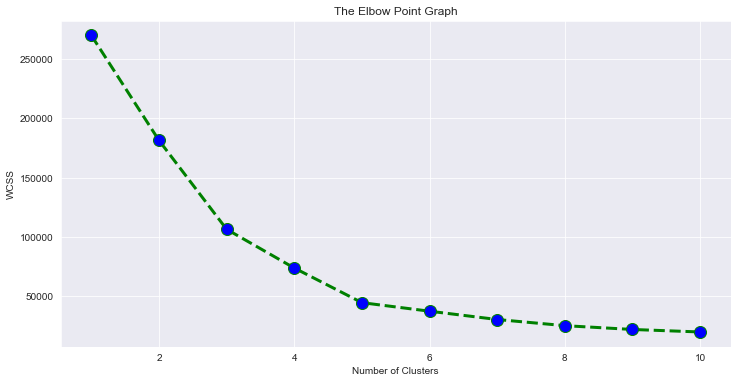

In [17]:
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11),wcss, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=12)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show

From the above graph one can see that from number of cluster = 4 to number of cluster = 5 there has been substantial decrease hence, I have chosen the K value for our dataset as 5.

## Train the K-Means Clustering Model

In [18]:
kmeans= KMeans(n_clusters = 5, init = 'k-means++') #initialize the class object
label= kmeans.fit_predict(X) #returns a cluster number for each of the data points
print(label)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


There will be only five values because we have stated from our model above that we need only 5 clusters. All the data points with 0 is 1 cluster and 4 is 5 cluster

### Checking the centers of out clusters (Also known as Centriods)

In [19]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


The above output are the X and Y centriod coordinates of all the clusters that have been created.

# Visualizing all the clusters

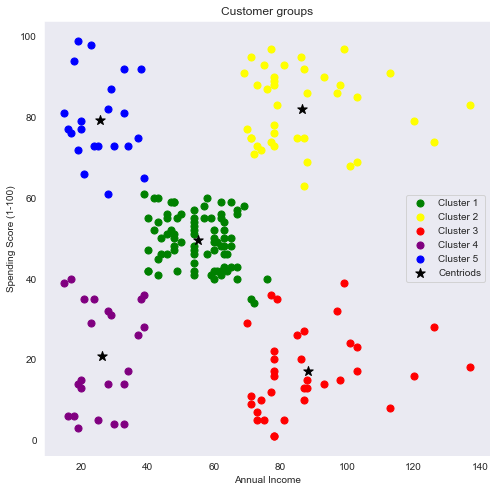

In [20]:
plt.figure(figsize=(8,8))
plt.scatter(X[label == 0,0], X[label== 0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[label == 1,0], X[label== 1,1], s=50, c='yellow', label='Cluster 2')
plt.scatter(X[label == 2,0], X[label== 2,1], s=50, c='red', label='Cluster 3')
plt.scatter(X[label == 3,0], X[label== 3,1], s=50, c='purple', label='Cluster 4')
plt.scatter(X[label == 4,0], X[label== 4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_ [:,0], kmeans.cluster_centers_ [:,1], s= 100, c='black', marker= '*', label='Centriods') #Plotting the centriods
plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()  

# Business Insights

The result of the analysis shows that the retail store customers can be group into 5 clusters or segments for targeted marketing.

**Cluster 1 (green):** These are average income earners with average spending scores. They are cautious with their spending at the store.

**CLuster 2 (yellow):** The customers in this group are high income earners and with high spending scores. They bring in profit. Discounts and other offers targeted at this group will increase their spending score and maximize profit.

**Cluster 3 (red):** This group of cutomers have a higher income but they do not spend more at the store. One of the assuption could be that they are not satisfied with the services rendered at the store. They are another ideal group to be targeted by the marketing team becuase they have the potential to bring in increased profit for the store. 

**Cluster 4 (purple):** Low income earners with low spending score. I can assume that this is so because people with low income will tend to purchase less item at the store.

**Cluster 5 (blue)**: These are low income earning customers with high spending scores. I can assume that why this group of customers spend more at the retail store despite earning less is because they enjoy and are satisfied with the services rendered at the retail store.